# Linear Regression (pne predictor variable) using TensorFlow

In [1]:
# !pip install tensorflow-probability
# !pip install tensorflow

# Generate Synthetic Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)

# generate 50 random numbers between 200 and 1000
n = 50
x = np.random.uniform(30, 100, n)

# Create a linear model and add a Noise of 0 mean, 5.0 std dev
y = 4.0 + 3.0*x + np.random.normal(0, 15.0, (1, n))

2024-02-12 01:26:58.600471: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 01:26:58.602764: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 01:26:58.628743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 01:26:58.628767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 01:26:58.629545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
x

array([68.41694527, 80.06325565, 72.19343633, 68.14182281, 59.65583595,
       75.21258791, 60.63110479, 92.42411005, 97.45639324, 56.84090632,
       85.42075267, 67.02264438, 69.76311928, 94.79176468, 34.97252407,
       36.09905098, 31.41528782, 88.28338919, 84.47097257, 90.90085038,
       98.50328396, 85.9410995 , 62.30355536, 84.63704234, 38.27920981,
       74.79447149, 40.03473012, 96.12682419, 66.52938252, 59.0263358 ,
       48.51889285, 84.19635826, 61.93052326, 69.79037642, 31.31528603,
       73.2344848 , 72.84670059, 73.18537978, 96.0623655 , 77.72742094,
       55.16555304, 60.59223677, 78.83418371, 34.21578301, 76.67367008,
       76.94465087, 44.72677928, 39.02484084, 52.07998456, 55.45975397])

In [4]:
y

array([[183.65678297, 273.45139787, 212.93552625, 201.85435391,
        164.17557746, 241.30011908, 161.68484665, 278.08122596,
        282.93718129, 180.32625642, 252.60018093, 187.35845039,
        212.8666244 , 294.8002721 , 109.91533056, 116.8342314 ,
         88.73103206, 263.40905008, 247.32601098, 271.30925371,
        287.31265764, 235.92905945, 193.57205821, 251.88441298,
         94.38465423, 235.32514831, 110.49471489, 293.15965352,
        214.524506  , 183.01375106, 166.64768881, 238.06668748,
        195.82669438, 203.0989779 ,  84.88390085, 215.02070941,
        217.86681379, 224.39861948, 274.70984888, 250.69466012,
        176.48159572, 162.733055  , 262.82633405, 135.08568668,
        251.70270381, 232.13508008, 122.1190485 , 136.89129841,
        154.19229949, 188.71593795]])

# Convert the data into Tensfor for using with Tensorflow

In [5]:

# Convert to TensorFlow tensors
x = tf.constant(x, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)


2024-02-12 01:27:01.516521: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Define the Model

In [6]:
# Initialize weights
w_0 = tf.Variable(0.0)
w_1 = tf.Variable(0.0)

# Define the Linear Regression model
def model(X):
    return w_1 * X + w_0

# Define the Cost Function/Loss Function: Mean Squared Error Loss

In [7]:

# Define the loss function (mean squared error)
def loss_fn(Y_hat, Y):
    # tf.reduce_mean calculates the mean of the argument vector
    return tf.reduce_mean(tf.square(Y_hat - Y))

# Set the Optimizer

In [8]:
# Define the optimizer
## Here we will use Stochastic Gradient Descent with Learning Rate of 0.1
optimizer = tf.optimizers.SGD(learning_rate=0.0001)

# Store the values of loss, w_0, and w_1 for plotting
loss_values = []
w_0_values = []
w_1_values = []

# Training Loop

In [9]:

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
    gradients = tape.gradient(loss, [w_0, w_1])
    optimizer.apply_gradients(zip(gradients, [w_0, w_1]))
    loss_values.append(loss.numpy())
    w_0_values.append(w_0.numpy())
    w_1_values.append(w_1.numpy())

In [10]:
w_0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.12629047>

# Check Your Results

w_0: 0.1262904703617096, w_1: 3.0127716064453125


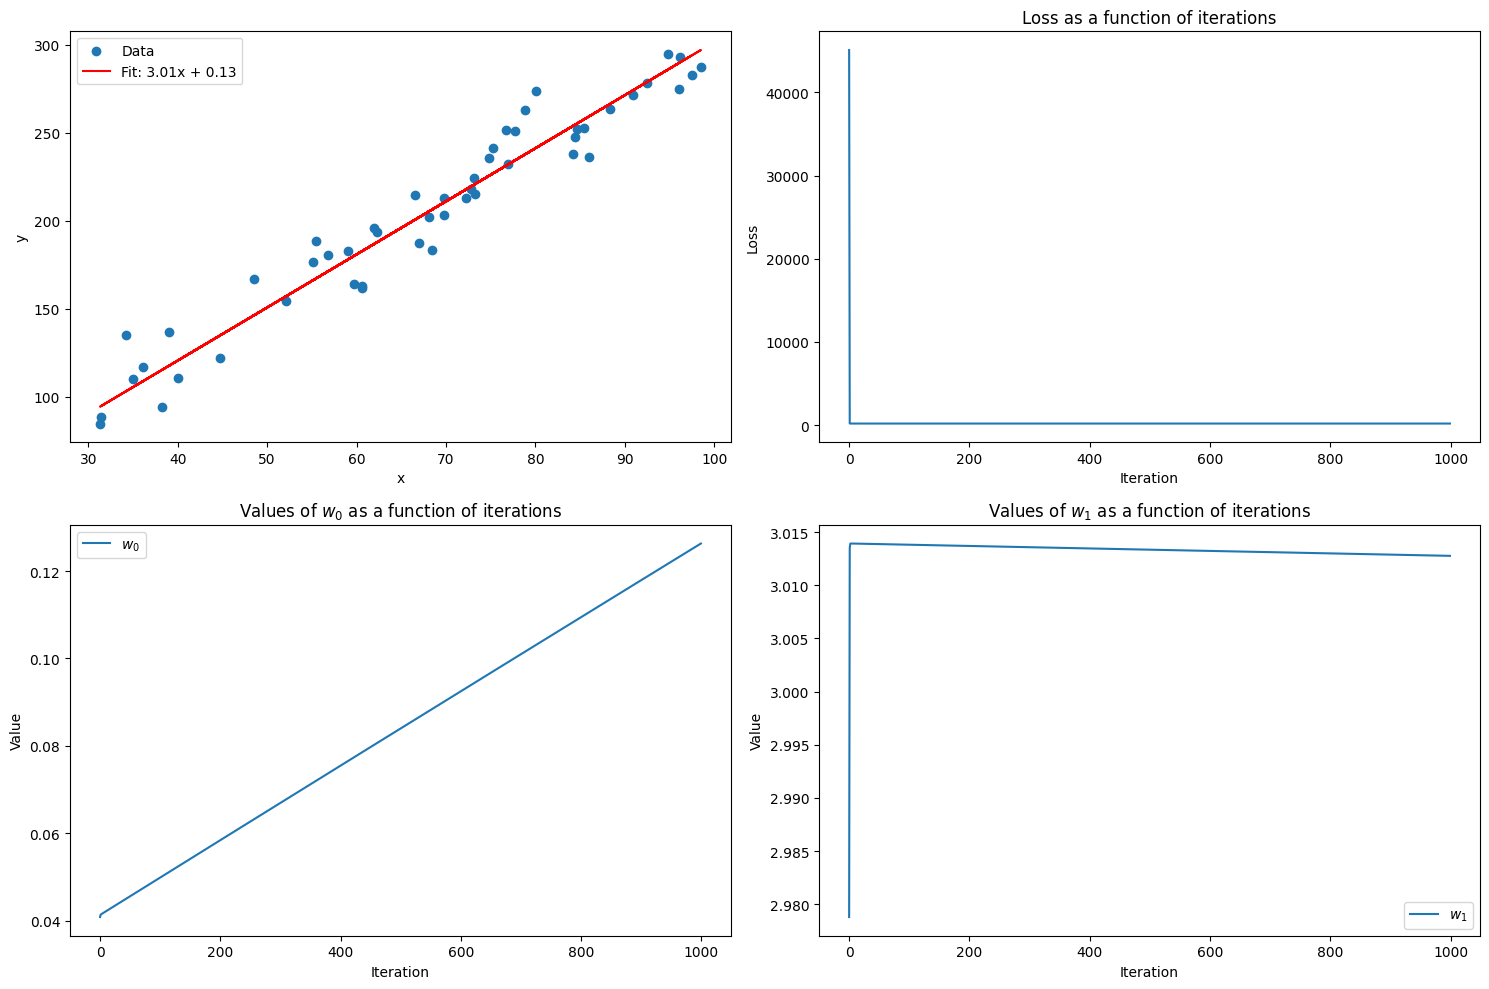

In [11]:


# Print the learned parameters
print(f"w_0: {w_0.numpy()}, w_1: {w_1.numpy()}")

# Plot the data and the learned line
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model(x), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the loss as a function of iterations
plt.subplot(2, 2, 2)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')

# Plot the values of w_0 and w_1 as a function of iterations
plt.subplot(2, 2, 3)
plt.plot(w_0_values, label='$w_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_0$ as a function of iterations')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(w_1_values, label='$w_1$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_1$ as a function of iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Make Inferences on Data

In [12]:
new_data_points = tf.constant([4.5, 19.91, 59.23])
predictions = model(new_data_points).numpy()
for x_new, pred in zip(new_data_points, predictions):
    print(f"The predicted value for x={x_new} is {pred}")


The predicted value for x=4.5 is 13.683762550354004
The predicted value for x=19.90999984741211 is 60.110572814941406
The predicted value for x=59.22999954223633 is 178.57275390625


## Calculating Confidence Interval

In [13]:
y_hat = model(x)
MSE = tf.reduce_mean(tf.square(y - y_hat))
SSE = tf.reduce_sum(tf.square(y - y_hat))
SSTO = tf.reduce_sum(tf.square(y -  tf.reduce_mean(y)))
R_squared = 1 - (SSE/SSTO)
R_squared

<tf.Tensor: shape=(), dtype=float32, numpy=0.94128394>

In [14]:
variance_w1 = MSE/tf.reduce_sum(tf.square(x -  tf.reduce_mean(x)))
variance_w1

<tf.Tensor: shape=(), dtype=float32, numpy=0.010732389>

In [15]:
variance_w0 =  MSE*(1/len(x) + (tf.reduce_mean(x)*tf.reduce_mean(x))/(tf.reduce_sum(tf.square(x -  tf.reduce_mean(x)))))
variance_w0

<tf.Tensor: shape=(), dtype=float32, numpy=53.026337>

In [16]:
import tensorflow_probability as tfp

# Degrees of freedom
df = 8
# Quantile
p = 0.975
# Create a Student's t-distribution
dist = tfp.distributions.StudentT(df=df, loc=0., scale=1.)

# Calculate the t-statistic
t_statistic = dist.quantile(p)

w1_upper = w_1 + t_statistic*variance_w1
w1_lower = w_1 - t_statistic*variance_w1
[w1_upper, w1_lower]

[<tf.Tensor: shape=(), dtype=float32, numpy=3.0375206>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.9880226>]

In [17]:
w0_upper = w_0 + t_statistic*variance_w0
w0_lower = w_0 - t_statistic*variance_w0
[w0_upper, w1_lower]

[<tf.Tensor: shape=(), dtype=float32, numpy=122.40529>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.9880226>]

In [18]:
# variance on predicted y
variance_y = MSE*(1/len(x) + (tf.square(x -  tf.reduce_mean(x)  )/(tf.reduce_sum(tf.square(x -  tf.reduce_mean(x))))))
variance_y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 3.90452  ,  5.550059 ,  4.1191406,  3.9008477,  4.5855002,
        4.510918 ,  4.4282007, 10.481383 , 13.428371 ,  5.154021 ,
        7.2847323,  3.9026575,  3.945912 , 11.800212 , 15.363868 ,
       14.587141 , 17.995352 ,  8.464153 ,  6.9322777,  9.696507 ,
       14.109752 ,  7.4860377,  4.2059793,  6.992507 , 13.161324 ,
        4.44499  , 12.087368 , 12.59692  ,  3.9119911,  4.697873 ,
        7.8294826,  6.8339806,  4.2503424,  3.9471512, 18.073252 ,
        4.23213  ,  4.1873236,  4.226278 , 12.557572 ,  4.986618 ,
        5.573123 ,  4.4340796,  5.2389874, 15.900926 ,  4.7707686,
        4.823999 ,  9.541645 , 12.697094 ,  6.502663 ,  5.4951653],
      dtype=float32)>

In [19]:
from scipy.stats import f

# Degrees of freedom
df1 = 2
df2 = len(x) - 2  # replace n with your sample size

# Quantile
p = 1 - 0.05  # replace alpha with your significance level

# Calculate the F-statistic
f_statistic = f.ppf(p, df1, df2)


y_upper = y_hat + f_statistic*variance_y
y_upper

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([218.70918, 259.0473 , 230.77168, 217.86859, 194.48679, 241.11775,
       196.92314, 312.02225, 336.5864 , 187.82004, 280.72308, 214.50253,
       222.89699, 323.36346, 154.51242, 155.42807, 152.19164, 293.11078,
       276.73706, 304.92868, 341.91455, 282.93307, 201.2528 , 277.42953,
       157.44699, 239.6477 , 159.30928, 329.92776, 213.04623, 192.94879,
       171.2844 , 275.59607, 200.2705 , 222.98305, 152.13892, 234.26863,
       232.95738, 234.10202, 329.60803, 250.2122 , 184.10983, 196.8248 ,
       254.35187, 153.94614, 246.34875, 247.335  , 165.32266, 158.21219,
       177.77962, 184.74744], dtype=float32)>

In [20]:
y_lower = y_hat - f_statistic*variance_y
y_lower

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([193.79268 , 223.62987 , 204.48558 , 192.9755  , 165.22461 ,
       212.33153 , 168.66478 , 245.13577 , 250.89384 , 154.9299  ,
       234.2359  , 189.5979  , 197.71632 , 248.06096 ,  56.468605,
        62.340904,  37.355118, 239.09717 , 232.49904 , 243.05087 ,
       251.8738  , 235.16127 , 174.41254 , 232.80717 ,  73.45861 ,
       211.2822  ,  82.174286, 249.5411  , 188.08203 , 162.96954 ,
       121.3209  , 231.98532 , 173.14714 , 197.79448 ,  36.805283,
       207.26149 , 206.23616 , 207.13223 , 249.47247 , 218.39034 ,
       148.5452  , 168.52893 , 220.9195  ,  52.47511 , 215.90433 ,
       216.55089 , 104.43308 ,  77.186264, 136.28316 , 149.6803  ],
      dtype=float32)>

Text(0.5, 1.0, 'WHS Band')

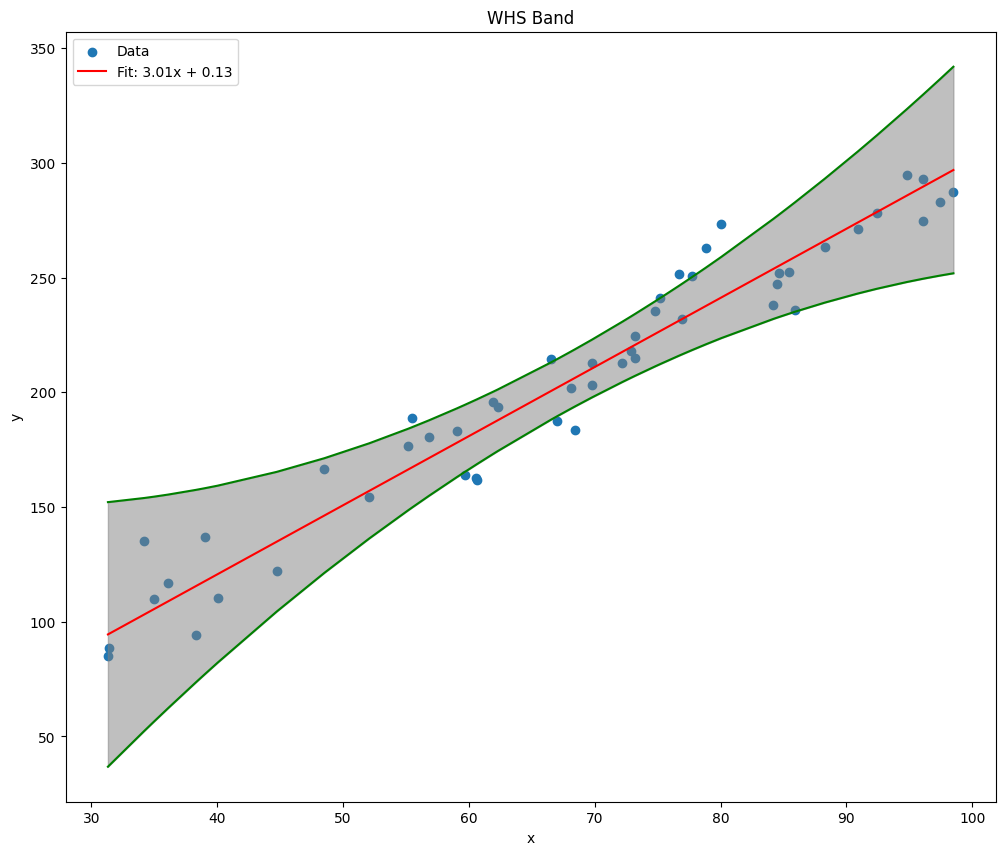

In [21]:
# Plot the data and the learned line
# Sort x, y_lower, and y_upper using the sorted indices
x = np.array(x)
y_lower = np.array(y_lower)
y_upper = np.array(y_upper)

# Get the sorted indices of x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_lower_sorted = y_lower[sorted_indices]
y_upper_sorted = y_upper[sorted_indices]

plt.figure(figsize=(12,10))
plt.scatter(x, y, label='Data')
plt.plot(x_sorted, model(x_sorted), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.plot(x_sorted, y_lower_sorted, color='green')
plt.plot(x_sorted, y_upper_sorted, color='green')
plt.fill_between(x_sorted, y_lower_sorted, y_upper_sorted, color='gray', alpha=0.5)  
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('WHS Band')

### Clearly, this is not a really good prediction model as WHS band is significantly wide.